# Illustrate retrospective cohort
We create three figures to illustrate comparisons between Molecular Oncology Almanac and PHIAL-TARGET on four cohorts: metastatic melanoma, metastatic castration-resistant prostate cancer, primary kidney cancer, and pediatric cancers. 

## Overall description of actionability
The first figure generated is a primary figure for the publication. We create a gridspec of five rows and four columns where each column represents a different cohort, described above. The first row will be the legend for the second and third rows, detailing the color for samples without a clinically relevant event, samples with events detected by both MOAlmanac and PHIAL-TARGET, and samples with events detected by both. 

The second row will be clinically relevant (ranked as either Investigate Actionability or Putatively Actionable) somatic variants and copy number alterations across all cohorts illustrated as a bar plot showing patients observed with an alteration by the Molecular Oncology Almanac and both by the Molecular Oncology Almanac and PHIAL-TARGET. 

The third row will be the same as above but will show fusions, germline variants, aneuploidy, tumor mutational burden, and mutational signatures. 

The fourth row will feature bar plots of showing patients with a relationship associated with therapeutic sensitivity by evidence for each cohort.

## Specific events
The next figure will appear in the supplement. In a prior version of the figure above, specific features were shown. Here, we similarly highly molecular features labeled as clinically relevant by either MOAlmanac and PHIAL-TARGET or just MOAlmanac. This is done for each cohort.

## Counts of features
The last figure will count the number of features per feature type per cohort.

In [1]:
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import pandas as pd

import sys
sys.path.append('../../common/')
import settings
settings.set_arial_as_font()

from settings import Colors
tableau10 = Colors.tableau10
comut_colors = Colors.comut_figure
grey = Colors.grey
greengradient = Colors.greengradient

redact_germline = True

%matplotlib inline

## Load data

In [2]:
df = pd.read_csv('retrospective.actionability.txt', sep='\t')
df.head()

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
0,KIRP-2K-A9WE,ASXL1.Amplification,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,ASXL1 Amp
1,KIRP-2K-A9WE,AURKA.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,Preclinical,NaN,Somatic copy number,AURKA Amp
2,KIRP-2K-A9WE,COSMIC Signature 12,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Mutational signature,COSMIC Signature 12
3,KIRP-2K-A9WE,COSMIC Signature 4,Investigate Actionability,NaN,1,KIRP,Inferential,NaN,NaN,NaN,Mutational signature,COSMIC Signature 4
4,KIRP-2K-A9WE,TPX2.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,NaN,Preclinical,NaN,Somatic copy number,TPX2 Amp


In [3]:
vanallen_sorted = pd.read_csv('retrospective.pivoted.vanallen.txt', sep='\t', index_col='feature_type')
vanallen_sorted.fillna(0, inplace=True)

In [4]:
robinson_sorted = pd.read_csv('retrospective.pivoted.robinson.txt', sep='\t', index_col='feature_type')
robinson_sorted.fillna(0, inplace=True)

In [5]:
perry_sorted = pd.read_csv('retrospective.pivoted.perry.txt', sep='\t', index_col='feature_type')
perry_sorted.fillna(0, inplace=True)

In [6]:
tcga_sorted = pd.read_csv('retrospective.pivoted.tcga.txt', sep='\t', index_col='feature_type')
tcga_sorted.fillna(0, inplace=True)

In [7]:
vanallen_counts_sens = pd.read_csv('retrospective.sensitivity-by-evidence.vanallen.txt', sep='\t')
vanallen_counts_sens

,evidence,counts,fraction,label
0,FDA-Approved,70,0.64,FDA
1,Guideline,9,0.08,Guideline
2,Clinical trial,1,0.01,Clinical trial
3,Clinical evidence,16,0.15,Clinical evidence
4,Preclinical,10,0.09,Preclinical
5,Inferential,1,0.01,Inferential
6,WT,3,0.03,No event associated with therapeutic sensitivity


In [8]:
robinson_counts_sens = pd.read_csv('retrospective.sensitivity-by-evidence.robinson.txt', sep='\t')
robinson_counts_sens

,evidence,counts,fraction,label
0,FDA-Approved,29.0,0.19,FDA
1,Guideline,78.0,0.52,Guideline
2,Clinical trial,4.0,0.03,Clinical trial
3,Clinical evidence,0.0,0.00,Clinical evidence
4,Preclinical,29.0,0.19,Preclinical
5,Inferential,1.0,0.01,Inferential
6,WT,9.0,0.06,No event associated with therapeutic sensitivity


In [9]:
perry_counts_sens = pd.read_csv('retrospective.sensitivity-by-evidence.perry.txt', sep='\t')
perry_counts_sens

,evidence,counts,fraction,label
0,FDA-Approved,5,0.09,FDA
1,Guideline,4,0.07,Guideline
2,Clinical trial,2,0.03,Clinical trial
3,Clinical evidence,1,0.02,Clinical evidence
4,Preclinical,17,0.28,Preclinical
5,Inferential,9,0.16,Inferential
6,WT,20,0.34,No event associated with therapeutic sensitivity


In [10]:
tcga_counts_sens = pd.read_csv('retrospective.sensitivity-by-evidence.tcga.txt', sep='\t')
tcga_counts_sens

,evidence,counts,fraction,label
0,FDA-Approved,16,0.16,FDA
1,Guideline,20,0.20,Guideline
2,Clinical trial,4,0.04,Clinical trial
3,Clinical evidence,9,0.09,Clinical evidence
4,Preclinical,16,0.16,Preclinical
5,Inferential,18,0.18,Inferential
6,WT,16,0.17,No event associated with therapeutic sensitivity


In [11]:
vanallen_feature_type_counts = pd.read_csv('retrospective.feature-type-counts.vanallen.txt', sep='\t', index_col='method')
vanallen_feature_type_counts

,Somatic variant,Somatic copy number,Rearrangement,Germline variant,Tumor mutational burden,Mutational signature,Aneuploidy
method,,,,,,,
PHIAL/TARGET,167.0,127.0,0.0,0.0,0.0,0.0,0.0
Molecular Oncology Almanac,601.0,137.0,19.0,0.0,44.0,5.0,62.0


In [12]:
robinson_feature_type_counts = pd.read_csv('retrospective.feature-type-counts.robinson.txt', sep='\t', index_col='method')
robinson_feature_type_counts

,Somatic variant,Somatic copy number,Rearrangement,Germline variant,Tumor mutational burden,Mutational signature,Aneuploidy
method,,,,,,,
PHIAL/TARGET,108.0,218.0,0.0,0.0,0.0,0.0,0.0
Molecular Oncology Almanac,235.0,227.0,108.0,0.0,4.0,35.0,75.0


In [13]:
perry_feature_type_counts = pd.read_csv('retrospective.feature-type-counts.perry.txt', sep='\t', index_col='method')
perry_feature_type_counts

,Somatic variant,Somatic copy number,Rearrangement,Germline variant,Tumor mutational burden,Mutational signature,Aneuploidy
method,,,,,,,
PHIAL/TARGET,16.0,61.0,0.0,0.0,0.0,0.0,0.0
Molecular Oncology Almanac,27.0,59.0,6.0,0.0,0.0,21.0,33.0


In [14]:
tcga_feature_type_counts = pd.read_csv('retrospective.feature-type-counts.tcga.txt', sep='\t', index_col='method')
tcga_feature_type_counts

,Somatic variant,Somatic copy number,Rearrangement,Germline variant,Tumor mutational burden,Mutational signature,Aneuploidy
method,,,,,,,
PHIAL/TARGET,19.0,22.0,0.0,0.0,0.0,0.0,0.0
Molecular Oncology Almanac,72.0,87.0,4.0,0.0,0.0,57.0,10.0


## Figure 2

In [15]:
def format_bar(ax):
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)
    
    plt.tick_params(axis = 'both', which = 'both',
                top = False, bottom = False, right = False, left = False, 
                labeltop = False, labelbottom = True, labelright = False, labelleft = True)
    
    plt.xticks(fontsize=14, rotation=45, ha='right')
    plt.yticks(fontsize=14)

def format_figure(ax, ylabels_boolean, label):
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_linewidth(2)
        ax.spines[spine].set_linestyle('--')
        
    plt.tick_params(axis='both', which='both',
                   top=False, bottom=False, right=False, left=False,
                   labeltop=False, labelbottom=False, labelright=False, labelleft=ylabels_boolean)
    
    if ylabels_boolean:
        plt.yticks([0, 1.5, 1], fontsize=9)
        ax.set_yticklabels([label], fontsize=20, minor=False)

def plot_bar(values, x_pos, y_pos, ymax, ylabel=''):
    ax = plt.subplot(gs[x_pos, y_pos])
    format_bar(ax)
    
    values.plot.bar(color=tableau10['blue'], width=0.9)
    plt.xticks(fontsize=14, rotation=45, ha='right')
    plt.yticks(fontsize=14)
    plt.ylim([0, 85])
    if ylabel != '':
        plt.ylabel(ylabel, fontsize=15)
        
def plot_comut(dataframe, grid, column, cmap, norm, ylabels=False, row_plus=0):
    for dtype_label in dataframe.index:
        dtype_idx = dataframe.index.get_loc(dtype_label)
        ax = plt.subplot(grid[dtype_idx + row_plus, column])
        format_figure(ax, ylabels, dtype_label)
        
        array = dataframe.loc[dtype_label, :].astype(int).values
        expanded = np.expand_dims(array, axis=0)
        plt.imshow(expanded, aspect='auto', interpolation='nearest', cmap=cmap, norm=norm)

def remove_spines(ax):
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)

def remove_ticks():
    plt.tick_params(axis = 'both', which = 'both',
                top = False, bottom = False, right = False, left = False, 
                labeltop = False, labelbottom = False, labelright = False, labelleft = False)

/miniconda3/envs/moalmanac-paper/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "


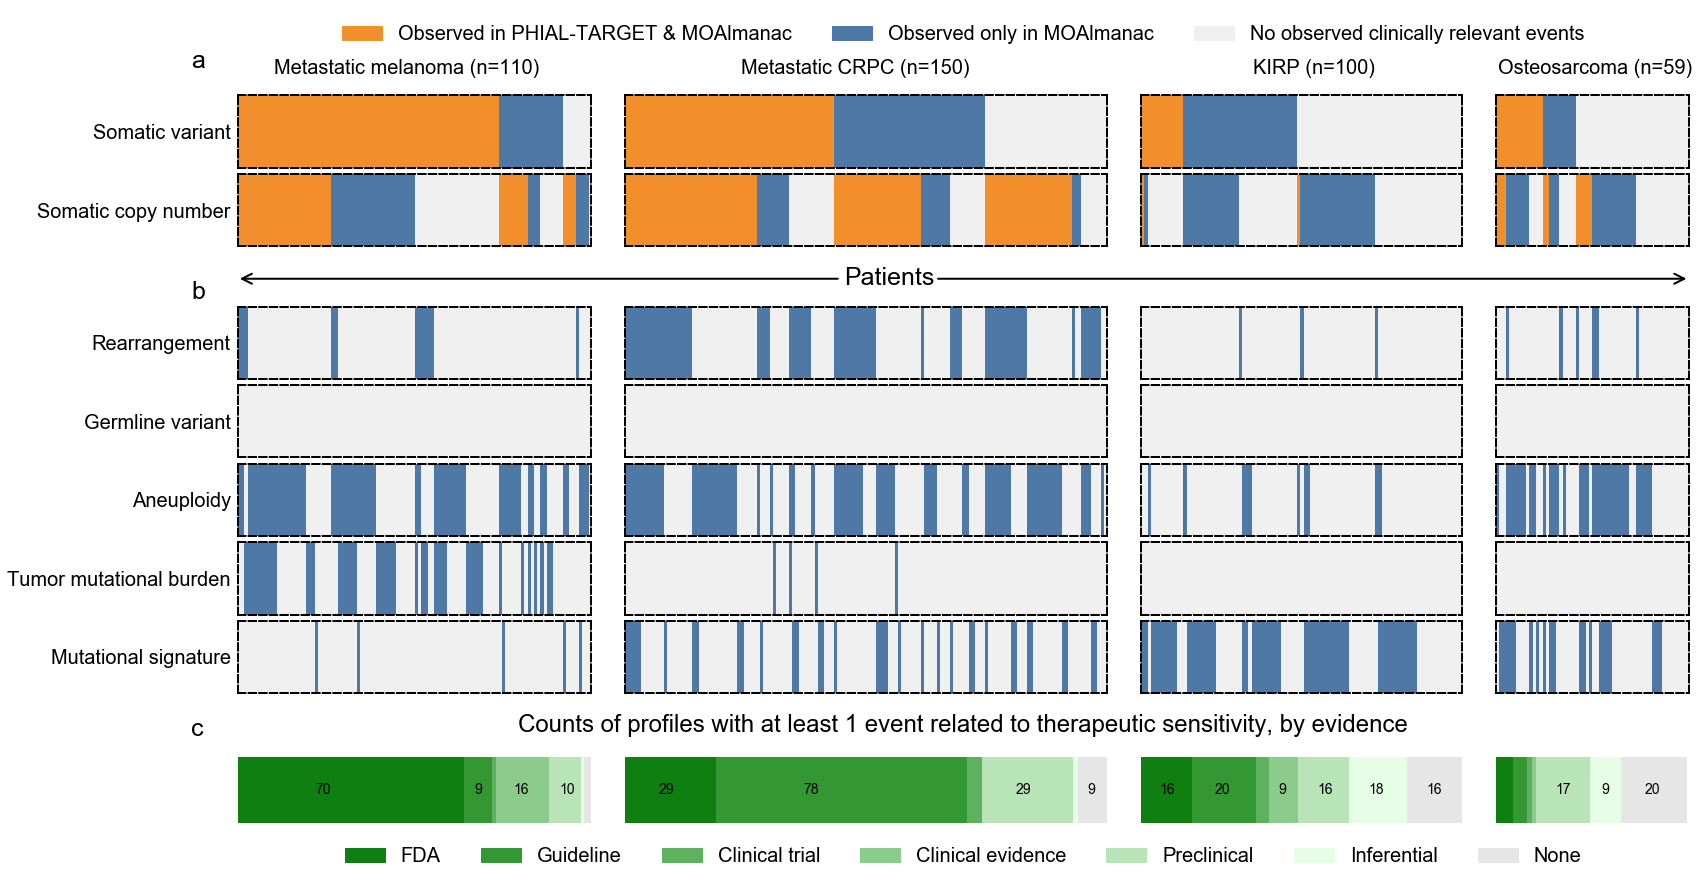

In [16]:
font_size = 20
font_size_sm = 18
font_size_lg = 25

fig = plt.figure(figsize=(26, 16), constrained_layout=True)
gs = gridspec.GridSpec(13, 4, 
                       width_ratios = [11, 15, 10, 6], 
                       height_ratios = [2, 1, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2])
gs.update(hspace=0.7, wspace=0.1)

# Row 0, legend
labels = ['Observed in PHIAL-TARGET & MOAlmanac',
          'Observed only in MOAlmanac',
          'No observed clinically relevant events']
legend_colors = [Colors.tableau10['orange'], 
                 Colors.tableau10['blue'], 
                 Colors.tableau10['white']]
ax_legend_main = plt.subplot(gs[0, 0:5])
patches = [mpatches.Patch(color=color, label=label) 
           for label, color in zip(labels, legend_colors)]
plt.legend(patches, labels, loc='center', frameon=False, fontsize=font_size, ncol=3)

remove_spines(ax_legend_main)
remove_ticks()

# Row 1-8. % of patients impacted by each feature type
gs.update(hspace = 0.1, wspace=0.1)
cmap = colors.ListedColormap(comut_colors)
bounds = [0, 1, 2, 3]
norm = colors.BoundaryNorm(bounds, cmap.N)

first_rows = ['Somatic variant', 'Somatic copy number']
second_rows = ['Rearrangement', 'Germline variant', 'Aneuploidy', 'Tumor mutational burden', 'Mutational signature']
plot_comut(vanallen_sorted.loc[first_rows, :], gs, 0, cmap, norm, ylabels=True, row_plus=2)
plot_comut(vanallen_sorted.loc[second_rows, :], gs, 0, cmap, norm, ylabels=True, row_plus=5)
plt.figtext(0.215, 0.83, 'Metastatic melanoma (n=110)', va="center", ha="center", fontsize=font_size)

plot_comut(robinson_sorted.loc[first_rows, :], gs, 1, cmap, norm, ylabels=False, row_plus=2)
plot_comut(robinson_sorted.loc[second_rows, :], gs, 1, cmap, norm, ylabels=False, row_plus=5)
plt.figtext(0.455, 0.83, 'Metastatic CRPC (n=150)', va="center", ha="center", fontsize=font_size)

plot_comut(tcga_sorted.loc[first_rows, :], gs, 2, cmap, norm, ylabels=False, row_plus=2)
plot_comut(tcga_sorted.loc[second_rows, :], gs, 2, cmap, norm, ylabels=False, row_plus=5)
plt.figtext(0.70, 0.83, 'KIRP (n=100)', va="center", ha="center", fontsize=font_size)

plot_comut(perry_sorted.loc[first_rows, :], gs, 3, cmap, norm, ylabels=False, row_plus=2)
plot_comut(perry_sorted.loc[second_rows, :], gs, 3, cmap, norm, ylabels=False, row_plus=5)
plt.figtext(0.85, 0.83, 'Osteosarcoma (n=59)', va="center", ha="center", fontsize=font_size)

## Patient x label
ax_x_label = plt.subplot(gs[4, :])
plt.xlim([0, 1])

ax_x_label.annotate('', (0, 0.45), (0.415, 0.45), ha='right', va='center', size=25,
                   arrowprops=dict(arrowstyle='->', fc='k', ec='k', linewidth=2))
ax_x_label.annotate('Patients', (1, 0.45), (0.48, 0.45), ha='right', va='center', size=25,
                   arrowprops=dict(arrowstyle='->', fc='k', ec='k', linewidth=2))

remove_spines(ax_x_label)
remove_ticks()

# Sensitivity by evidence, melanoma

evidence_gradient = [
    greengradient[5], 
    greengradient[4], 
    greengradient[3], 
    greengradient[2],
    greengradient[1], 
    greengradient[0], 
    grey[3]
]

gradient_colors = {}
gradient_colors[0] = greengradient[5]
gradient_colors[1] = greengradient[4]
gradient_colors[2] = greengradient[3]
gradient_colors[3] = greengradient[2]
gradient_colors[4] = greengradient[1]
gradient_colors[5] = greengradient[0]
gradient_colors[6] = grey[3]

evidence_labels = ['FDA', 'Guideline', 'Clinical trial', 'Clinical evidence', 
                   'Preclinical', 'Inferential', 
                   'None']

ax_melanoma_sensitive = plt.subplot(gs[11, 0])

total = 0
for index in vanallen_counts_sens.index:
    counts = vanallen_counts_sens.loc[index, 'counts']
    fraction = vanallen_counts_sens.loc[index, 'fraction']
    label = vanallen_counts_sens.loc[index, 'label']
    if fraction != 0.0:
        plt.barh(0.5, round(fraction, 2), color=gradient_colors[index], align='center', left=total, label=label)
        if fraction != 0.01 and counts > 5:
            plt.text(round(total + 0.35*fraction, 2), 0.45, str(int(counts)), fontsize=14)
    total+=round(fraction, 2)

plt.xlim([0, 1])

remove_spines(ax_melanoma_sensitive)
remove_ticks()

#title = 'Metastatic melanoma profiles (n=110) with at least 1 event\nrelated to therapeutic sensitivity, by evidence'
#plt.title(title, fontsize=font_size)

# Sensitivity by evidence, prostate

evidence_gradient = [
    greengradient[5], 
    greengradient[4], 
    greengradient[3], 
    greengradient[2],
    greengradient[1], 
    greengradient[0], 
    grey[3]
]

gradient_colors = {}
gradient_colors[0] = greengradient[5]
gradient_colors[1] = greengradient[4]
gradient_colors[2] = greengradient[3]
gradient_colors[3] = greengradient[2]
gradient_colors[4] = greengradient[1]
gradient_colors[5] = greengradient[0]
gradient_colors[6] = grey[3]

evidence_labels = ['FDA', 'Guideline', 'Clinical trial', 'Clinical evidence', 
                   'Preclinical', 'Inferential', 
                   'None']

ax_robinson_sensitive = plt.subplot(gs[11, 1])

total = 0
for index in robinson_counts_sens.index:
    counts = robinson_counts_sens.loc[index, 'counts']
    fraction = robinson_counts_sens.loc[index, 'fraction']
    label = robinson_counts_sens.loc[index, 'label']
    if fraction != 0.0:
        plt.barh(0.5, round(fraction, 2), color=gradient_colors[index], align='center', left=total, label=label)
        if fraction != 0.01 and counts > 5:
            plt.text(round(total + 0.35*fraction, 2), 0.45, str(int(counts)), fontsize=14)
    total+=round(fraction, 2)

plt.xlim([0, 1])

remove_spines(ax_robinson_sensitive)
remove_ticks()

#title = 'Metastatic melanoma profiles (n=110) with at least 1 event\nrelated to therapeutic sensitivity, by evidence'
#plt.title(title, fontsize=font_size)

# Sensitivity by evidence, kirp

evidence_gradient = [
    greengradient[5], 
    greengradient[4], 
    greengradient[3], 
    greengradient[2],
    greengradient[1], 
    greengradient[0], 
    grey[3]
]

gradient_colors = {}
gradient_colors[0] = greengradient[5]
gradient_colors[1] = greengradient[4]
gradient_colors[2] = greengradient[3]
gradient_colors[3] = greengradient[2]
gradient_colors[4] = greengradient[1]
gradient_colors[5] = greengradient[0]
gradient_colors[6] = grey[3]

evidence_labels = ['FDA', 'Guideline', 'Clinical trial', 'Clinical evidence', 
                   'Preclinical', 'Inferential', 
                   'None']

ax_tcga_sensitive = plt.subplot(gs[11, 2])

total = 0
for index in tcga_counts_sens.index:
    counts = tcga_counts_sens.loc[index, 'counts']
    fraction = tcga_counts_sens.loc[index, 'fraction']
    label = tcga_counts_sens.loc[index, 'label']
    if fraction != 0.0:
        plt.barh(0.5, round(fraction, 2), color=gradient_colors[index], align='center', left=total, label=label)
        if fraction != 0.01 and counts > 5:
            plt.text(round(total + 0.35*fraction, 2), 0.45, str(int(counts)), fontsize=14)
    total+=round(fraction, 2)

plt.xlim([0, 1])

remove_spines(ax_tcga_sensitive)
remove_ticks()

#title = 'Metastatic melanoma profiles (n=110) with at least 1 event\nrelated to therapeutic sensitivity, by evidence'
#plt.title(title, fontsize=font_size)

# Sensitivity by evidence, os

evidence_gradient = [
    greengradient[5], 
    greengradient[4], 
    greengradient[3], 
    greengradient[2],
    greengradient[1], 
    greengradient[0], 
    grey[3]
]

gradient_colors = {}
gradient_colors[0] = greengradient[5]
gradient_colors[1] = greengradient[4]
gradient_colors[2] = greengradient[3]
gradient_colors[3] = greengradient[2]
gradient_colors[4] = greengradient[1]
gradient_colors[5] = greengradient[0]
gradient_colors[6] = grey[3]

evidence_labels = ['FDA', 'Guideline', 'Clinical trial', 'Clinical evidence', 
                   'Preclinical', 'Inferential', 
                   'None']

ax_perry_sensitive = plt.subplot(gs[11, 3])

total = 0
for index in perry_counts_sens.index:
    counts = perry_counts_sens.loc[index, 'counts']
    fraction = perry_counts_sens.loc[index, 'fraction']
    label = perry_counts_sens.loc[index, 'label']
    if fraction != 0.0:
        plt.barh(0.5, round(fraction, 2), color=gradient_colors[index], align='center', left=total, label=label)
        if fraction != 0.01 and counts > 5:
            plt.text(round(total + 0.35*fraction, 2), 0.45, str(int(counts)), fontsize=14)
    total+=round(fraction, 2)

plt.xlim([0, 1])

remove_spines(ax_perry_sensitive)
remove_ticks()

#title = 'Metastatic melanoma profiles (n=110) with at least 1 event\nrelated to therapeutic sensitivity, by evidence'
#plt.title(title, fontsize=font_size)

# Title for c
ax_x_label = plt.subplot(gs[10, :])
plt.xlim([0, 1])

title = 'Counts of profiles with at least 1 event related to therapeutic sensitivity, by evidence'
ax_x_label.annotate(title, (0, 0.45), (0.50, 0.45), ha='center', va='center', size=24)

remove_spines(ax_x_label)
remove_ticks()

# Legend for by sensitivity
ax_legend_main = plt.subplot(gs[12, :])
patches = [mpatches.Patch(color=color, label=label) 
           for label, color in zip(evidence_labels, evidence_gradient)]
plt.legend(patches, evidence_labels, loc='center', frameon=False, fontsize=font_size, ncol=7)

remove_spines(ax_legend_main)
remove_ticks()

fig_label_x = 0.1
fig_label_y_a = 0.83
fig_label_y_b = 0.63
fig_label_y_c = 0.25

plt.figtext(fig_label_x, fig_label_y_a, 'a', fontsize=font_size_lg)
plt.figtext(fig_label_x, fig_label_y_b, 'b', fontsize=font_size_lg)
plt.figtext(fig_label_x, fig_label_y_c, 'c', fontsize=font_size_lg)

filename = 'figure-2'
folder = f'../../figures/figure-02'
!mkdir -p $folder
for suffix in ['svg', 'png', 'pdf']:
    outname = f'{folder}/{filename}.{suffix}'
    plt.savefig(outname, format=suffix)
    
plt.show()

In [17]:
## Figure 2 a & b
def prepare_sorted_data_for_concat(dataframe):
    return dataframe.T.reset_index().rename(columns={'index': 'sample_name'})

vanallen_sorted_data = prepare_sorted_data_for_concat(vanallen_sorted)
vanallen_sorted_data['cohort'] = 'metastatic melanoma'

robinson_sorted_data = prepare_sorted_data_for_concat(robinson_sorted)
robinson_sorted_data['cohort'] = 'mCRPC'

kirp_sorted_data = prepare_sorted_data_for_concat(tcga_sorted)
kirp_sorted_data['cohort'] = 'KIRP'

perry_sorted_data = prepare_sorted_data_for_concat(perry_sorted)
perry_sorted_data['cohort'] = 'OS'

(pd
 .concat([vanallen_sorted_data, robinson_sorted_data, kirp_sorted_data, perry_sorted_data])
 .to_excel(f'{folder}/{filename}-ab.xlsx', index=False)
)

## Figure 2 c
def prepare_sens_counts_for_concat(dataframe, cohort):
    dataframe['cohort'] = cohort
    return dataframe

vanallen_counts_data = prepare_sens_counts_for_concat(vanallen_counts_sens, 'metastatic melanoma')
robinson_counts_data = prepare_sens_counts_for_concat(robinson_counts_sens, 'mCRPC')
tcga_counts_data = prepare_sens_counts_for_concat(tcga_counts_sens, 'KIRP')
perry_counts_data = prepare_sens_counts_for_concat(perry_counts_sens, 'OS')

(pd
 .concat([vanallen_counts_data, robinson_counts_data, tcga_counts_data, perry_counts_data])
 .to_excel(f'{folder}/{filename}-c.xlsx', index=False)
)

## Supplementary Figure, specific events per cohort
Different data type per row, first order features on left and other stuff on right

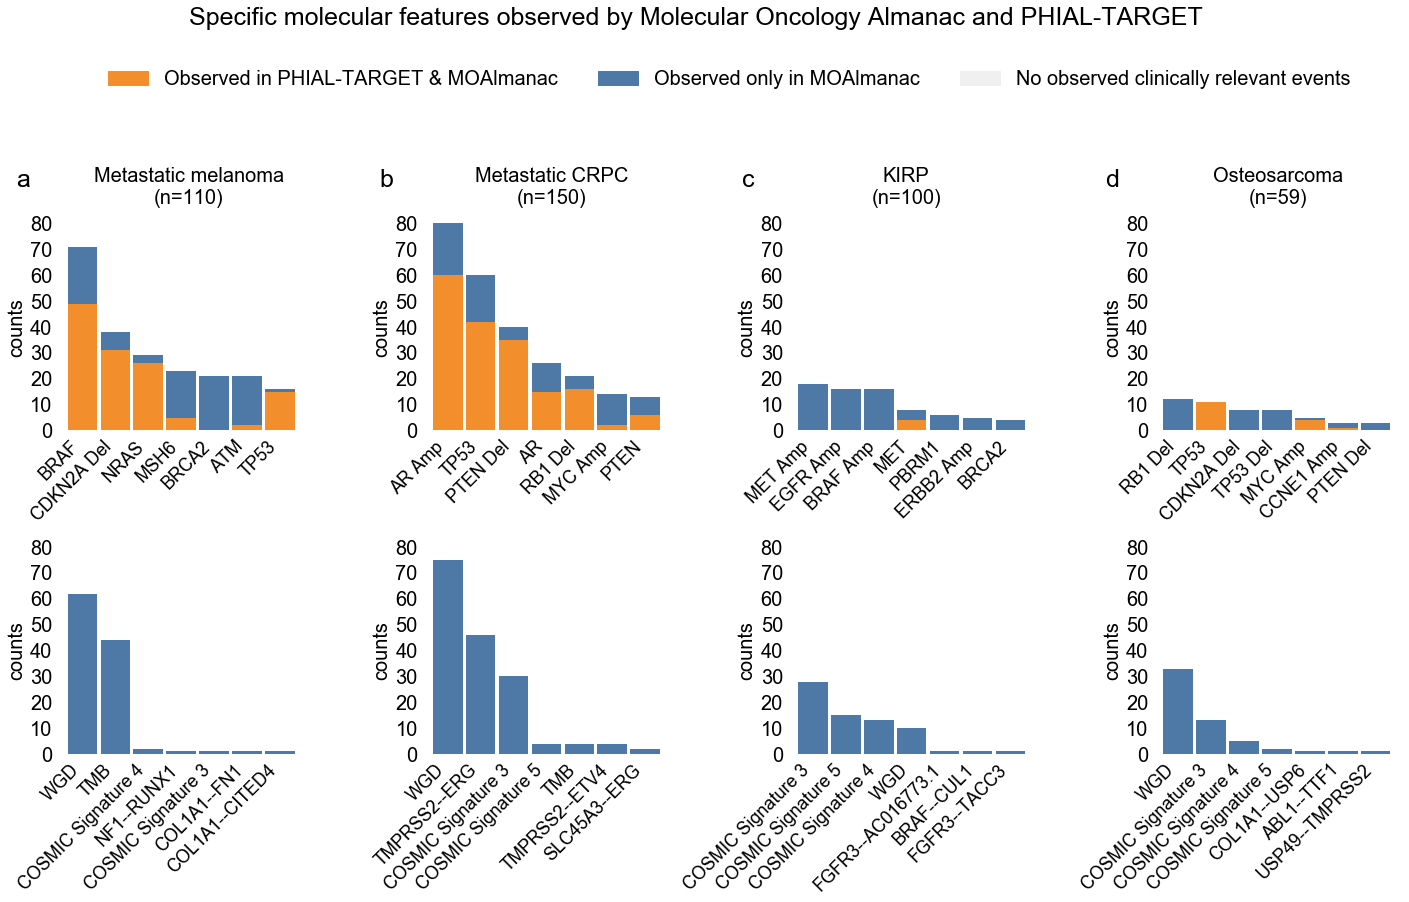

In [18]:
font_size = 20
font_size_sm = 18
font_size_lg = 25
display_n = 7

Y_TITLE = 1
Y_FIRST = 2
Y_SECOND = 3
fig_label_y = 0.65

fig = plt.figure(figsize=(24, 15))
gs = gridspec.GridSpec(4, 4, 
                       width_ratios = [1, 1, 1, 1], 
                       height_ratios = [0.25, 0.5, 3, 3],
                       #bottom=0.5, 
                       hspace=0.025)

# Row 0, legend
labels = ['Observed in PHIAL-TARGET & MOAlmanac',
          'Observed only in MOAlmanac',
          'No observed clinically relevant events']
legend_colors = [Colors.tableau10['orange'], 
                 Colors.tableau10['blue'], 
                 Colors.tableau10['white']]
ax_legend_main = plt.subplot(gs[Y_TITLE, :])
patches = [mpatches.Patch(color=color, label=label) 
           for label, color in zip(labels, legend_colors)]
plt.legend(patches, labels, loc='lower center', frameon=False, fontsize=font_size, ncol=3)

remove_spines(ax_legend_main)
remove_ticks()

#title = 'Counts of observed molecular features by cohort across profiles'
#ax_legend_main.annotate(title, (0, -0.05), (0, 0), ha='center', va='center', size=24)

# Set up
idx_v = df['cohort'].eq('MEL')
idx_r = df['cohort'].eq('SU2C')
idx_k = df['cohort'].eq('KIRP')
idx_o = df['cohort'].eq('OS')

idx_almanac = df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_phial = df['phial_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_both = idx_almanac & idx_phial

idx_std = df['feature_type'].isin(['Somatic variant', 'Somatic copy number'])
idx_nstd = ~idx_std

v_std_almanac = df[idx_v & idx_std & idx_almanac]['feature_str_simple'].value_counts().head(display_n)
v_std_both = df[idx_v & idx_std & idx_both]['feature_str_simple'].value_counts().reindex(v_std_almanac.index).fillna(0)
v_std_almanac_only = v_std_almanac.subtract(v_std_both)
v_nstd = df[idx_v & idx_nstd & idx_almanac]['feature_str_simple'].value_counts().head(display_n)

r_std_almanac = df[idx_r & idx_std & idx_almanac]['feature_str_simple'].value_counts().head(display_n)
r_std_both = df[idx_r & idx_std & idx_both]['feature_str_simple'].value_counts().reindex(r_std_almanac.index).fillna(0)
r_std_almanac_only = r_std_almanac.subtract(r_std_both)
r_nstd = df[idx_r & idx_nstd & idx_almanac]['feature_str_simple'].value_counts().head(display_n)

k_std_almanac = df[idx_k & idx_std & idx_almanac]['feature_str_simple'].value_counts().head(display_n)
k_std_both = df[idx_k & idx_std & idx_both]['feature_str_simple'].value_counts().reindex(k_std_almanac.index).fillna(0)
k_std_almanac_only = k_std_almanac.subtract(k_std_both)
k_nstd = df[idx_k & idx_nstd & idx_almanac]['feature_str_simple'].value_counts().head(display_n)

o_std_almanac = df[idx_o & idx_std & idx_almanac]['feature_str_simple'].value_counts().head(display_n)
o_std_both = df[idx_o & idx_std & idx_both]['feature_str_simple'].value_counts().reindex(o_std_almanac.index).fillna(0)
o_std_almanac_only = o_std_almanac.subtract(o_std_both)
o_nstd = df[idx_o & idx_nstd & idx_almanac]['feature_str_simple'].value_counts().head(display_n)

# Column 0: Metastatic melanoma
## Row 0: first-order features

ax_m_feature_1 = plt.subplot(gs[Y_FIRST, 0])
format_bar(ax_m_feature_1)
p1 = v_std_both.plot.bar(color=tableau10['orange'], width=0.9)
p2 = v_std_almanac_only.plot.bar(color=tableau10['blue'], width=0.9, bottom=v_std_both)

plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(fontsize=font_size)
plt.ylim([0, 80])
plt.ylabel('counts', fontsize=font_size)

plt.figtext(0.20, fig_label_y, 'Metastatic melanoma\n(n=110)', va="center", ha="center", fontsize=font_size)

## Row 1: second-order features
gs.update(hspace=1, wspace=0.5)
ax_m_feature_2 = plt.subplot(gs[Y_SECOND, 0])
format_bar(ax_m_feature_2)

p3 = v_nstd.plot.bar(color=tableau10['blue'], width=0.9)
plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(fontsize=font_size)
plt.ylim([0, 80])
plt.ylabel('counts', fontsize=font_size)

# Column 1: Metastatic CRPC
## Row 0: first-order features

ax_r_feature_1 = plt.subplot(gs[Y_FIRST, 1])
format_bar(ax_r_feature_1)
p1 = r_std_both.plot.bar(color=tableau10['orange'], width=0.9)
p2 = r_std_almanac_only.plot.bar(color=tableau10['blue'], width=0.9, bottom=r_std_both)

plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(fontsize=font_size)
plt.ylim([0, 80])
plt.ylabel('counts', fontsize=font_size)

plt.figtext(0.41, fig_label_y, 'Metastatic CRPC\n(n=150)', va="center", ha="center", fontsize=font_size)

## Row 1: second-order features
ax_r_feature_2 = plt.subplot(gs[Y_SECOND, 1])
format_bar(ax_r_feature_2)

p3 = r_nstd.plot.bar(color=tableau10['blue'], width=0.9)
plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(fontsize=font_size)
plt.ylim([0, 80])
plt.ylabel('counts', fontsize=font_size)

# Column 2: KIRP
## Row 0: first-order features

ax_k_feature_1 = plt.subplot(gs[Y_FIRST, 2])
format_bar(ax_k_feature_1)
p1 = k_std_both.plot.bar(color=tableau10['orange'], width=0.9)
p2 = k_std_almanac_only.plot.bar(color=tableau10['blue'], width=0.9, bottom=k_std_both)

plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(fontsize=font_size)
plt.ylim([0, 80])
plt.ylabel('counts', fontsize=font_size)

plt.figtext(0.615, fig_label_y, 'KIRP\n(n=100)', va="center", ha="center", fontsize=font_size)

## Row 1: second-order features
ax_k_feature_2 = plt.subplot(gs[Y_SECOND, 2])
format_bar(ax_k_feature_2)

p3 = k_nstd.plot.bar(color=tableau10['blue'], width=0.9)
plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(fontsize=font_size)
plt.ylim([0, 80])
plt.ylabel('counts', fontsize=font_size)

# Column 3: OS
## Row 0: first-order features

ax_o_feature_1 = plt.subplot(gs[Y_FIRST, 3])
format_bar(ax_o_feature_1)
p1 = o_std_both.plot.bar(color=tableau10['orange'], width=0.9)
p2 = o_std_almanac_only.plot.bar(color=tableau10['blue'], width=0.9, bottom=o_std_both)

plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(fontsize=font_size)
plt.ylim([0, 80])
plt.ylabel('counts', fontsize=font_size)

plt.figtext(0.83, fig_label_y, 'Osteosarcoma\n(n=59)', va="center", ha="center", fontsize=font_size)

## Row 1: second-order features
ax_o_feature_2 = plt.subplot(gs[Y_SECOND, 3])
format_bar(ax_o_feature_2)

p3 = o_nstd.plot.bar(color=tableau10['blue'], width=0.9)
plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(fontsize=font_size)
plt.ylim([0, 80])
plt.ylabel('counts', fontsize=font_size)

fig_label_x_a = 0.10
fig_label_x_b = 0.31
fig_label_x_c = 0.52
fig_label_x_d = 0.73

plt.figtext(fig_label_x_a, fig_label_y, 'a', fontsize=font_size_lg)
plt.figtext(fig_label_x_b, fig_label_y, 'b', fontsize=font_size_lg)
plt.figtext(fig_label_x_c, fig_label_y, 'c', fontsize=font_size_lg)
plt.figtext(fig_label_x_d, fig_label_y, 'd', fontsize=font_size_lg)

title = 'Specific molecular features observed by Molecular Oncology Almanac and PHIAL-TARGET'
plt.figtext(0.20, 0.80, title, fontsize=font_size_lg)

filename = 'supplementary-figure-3'
folder = f'../../figures/supplementary-figure-03'
!mkdir -p $folder
for suffix in ['svg', 'png', 'pdf']:
    outname = f'{folder}/{filename}.{suffix}'
    plt.savefig(outname, format=suffix, bbox_inches='tight')

plt.show()

In [19]:
(df
 .loc[idx_almanac, :]
 .drop('sum', axis=1)
 .to_excel(f'{folder}/{filename}.xlsx', index=False)
)

## Illustrate raw number of features obsered by Molecular Oncology Almanac versus PHIAL-TARGET per group

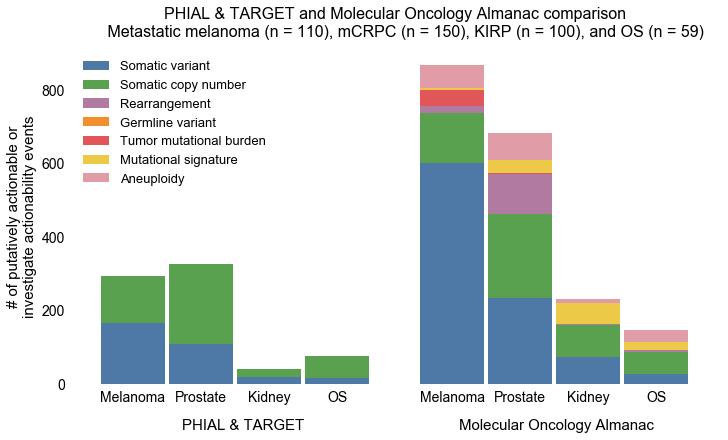

In [20]:
supp_data_kirp = tcga_feature_type_counts
supp_data_mel = vanallen_feature_type_counts
supp_data_mcrpc = robinson_feature_type_counts
supp_data_os = perry_feature_type_counts

fig = plt.figure(figsize = (10, 6), constrained_layout=True)
ax = plt.subplot()

remove_spines(ax)
plt.tick_params(axis = 'both', which = 'both',
            top = False, bottom = False, right = False, left = False, 
            labeltop = False, labelbottom = True, labelright = False, labelleft = True)

dtype_color_map = {
    'Somatic variant': tableau10['blue'],
    'Somatic copy number': tableau10['green'],
    'Rearrangement': tableau10['purple'],
    'Germline variant': tableau10['orange'],
    'Tumor mutational burden': tableau10['red'],
    'Mutational signature': tableau10['yellow'],
    'Aneuploidy': tableau10['pink']
}

width = 0.3

mel_phial = 0
mel_almanac = 0
su2c_phial = 0
su2c_almanac = 0
kirp_phial = 0
kirp_almanac = 0
os_phial = 0
os_almanac = 0

for column in supp_data_mel.columns:
    value = supp_data_mel.loc['PHIAL/TARGET', column]
    plt.bar(0.52, value, width, color=dtype_color_map[column], align='center', bottom=mel_phial, label=column)
    mel_phial += value 
    
    value = supp_data_mcrpc.loc['PHIAL/TARGET', column]
    plt.bar(0.84, value, width, color=dtype_color_map[column], align='center', bottom=su2c_phial)
    su2c_phial += value 
    
    value = supp_data_kirp.loc['PHIAL/TARGET', column]
    plt.bar(1.16, value, width, color=dtype_color_map[column], align='center', bottom=kirp_phial)
    kirp_phial += value 
    
    value = supp_data_os.loc['PHIAL/TARGET', column]
    plt.bar(1.48, value, width, color=dtype_color_map[column], align='center', bottom=os_phial)
    os_phial += value 

    value = supp_data_mel.loc['Molecular Oncology Almanac', column]
    plt.bar(2.02, value, width, color=dtype_color_map[column], align='center', bottom=mel_almanac)
    mel_almanac += value 
    
    value = supp_data_mcrpc.loc['Molecular Oncology Almanac', column]
    plt.bar(2.34, value, width, color=dtype_color_map[column], align='center', bottom=su2c_almanac)
    su2c_almanac += value 
    
    value = supp_data_kirp.loc['Molecular Oncology Almanac', column]
    plt.bar(2.66, value, width, color=dtype_color_map[column], align='center', bottom=kirp_almanac)
    kirp_almanac += value 
    
    value = supp_data_os.loc['Molecular Oncology Almanac', column]
    plt.bar(2.98, value, width, color=dtype_color_map[column], align='center', bottom=os_almanac)
    os_almanac += value 
    
plt.ylabel('# of putatively actionable or\ninvestigate actionability events', fontsize = 15)

labels = ['Melanoma', 'Prostate', 'Kidney', 'OS', 
          'Melanoma', 'Prostate', 'Kidney', 'OS']
ax.set_xticks([0.52, 0.84, 1.16, 1.48, 
               2.02, 2.34, 2.66, 2.98])
ax.set_xticklabels(labels, fontsize = 14)
ax.tick_params(axis='y', which='major', labelsize=14)

title = 'PHIAL & TARGET and Molecular Oncology Almanac comparison\n \
    Metastatic melanoma (n = 110), mCRPC (n = 150), KIRP (n = 100), and OS (n = 59)'

plt.title(title, y = 1.02, fontsize = 16)
plt.legend(loc = 0, ncol = 1, frameon=False, fontsize=13)

plt.text(0.75, -125,'PHIAL & TARGET', fontsize = 15)
plt.text(2.05, -125,'Molecular Oncology Almanac', fontsize = 15)

filename = 'supplementary-figure-4'
folder = f'../../figures/supplementary-figure-04'
!mkdir -p $folder
for suffix in ['svg', 'png', 'pdf']:
    outname = f'{folder}/{filename}.{suffix}'
    plt.savefig(outname, format=suffix)

plt.show()

In [21]:
def prepare_supp_data_for_concat(dataframe, cohort):
    df = dataframe.reset_index()
    df['cohort'] = cohort
    return df

supp_data_kirp = prepare_supp_data_for_concat(supp_data_kirp, 'KIRP')
supp_data_mel = prepare_supp_data_for_concat(supp_data_mel, 'metastatic melanoma')
supp_data_mcrpc = prepare_supp_data_for_concat(supp_data_mcrpc, 'mCRPC')
supp_data_os = prepare_supp_data_for_concat(supp_data_os, 'OS')

(pd
 .concat([supp_data_kirp, supp_data_mel, supp_data_mcrpc, supp_data_os])
 .to_excel(f'{folder}/{filename}.xlsx', index=False)
)

## Illustrate results by bin
We create a figure similar to that above, except that it will be an 4x2 gridpsec. Each row will feature a different tumor type. The left columns will feature putatively actionable counts while the rightside will have investigate actionability counts. Columns will be bar charts by data type, like above.

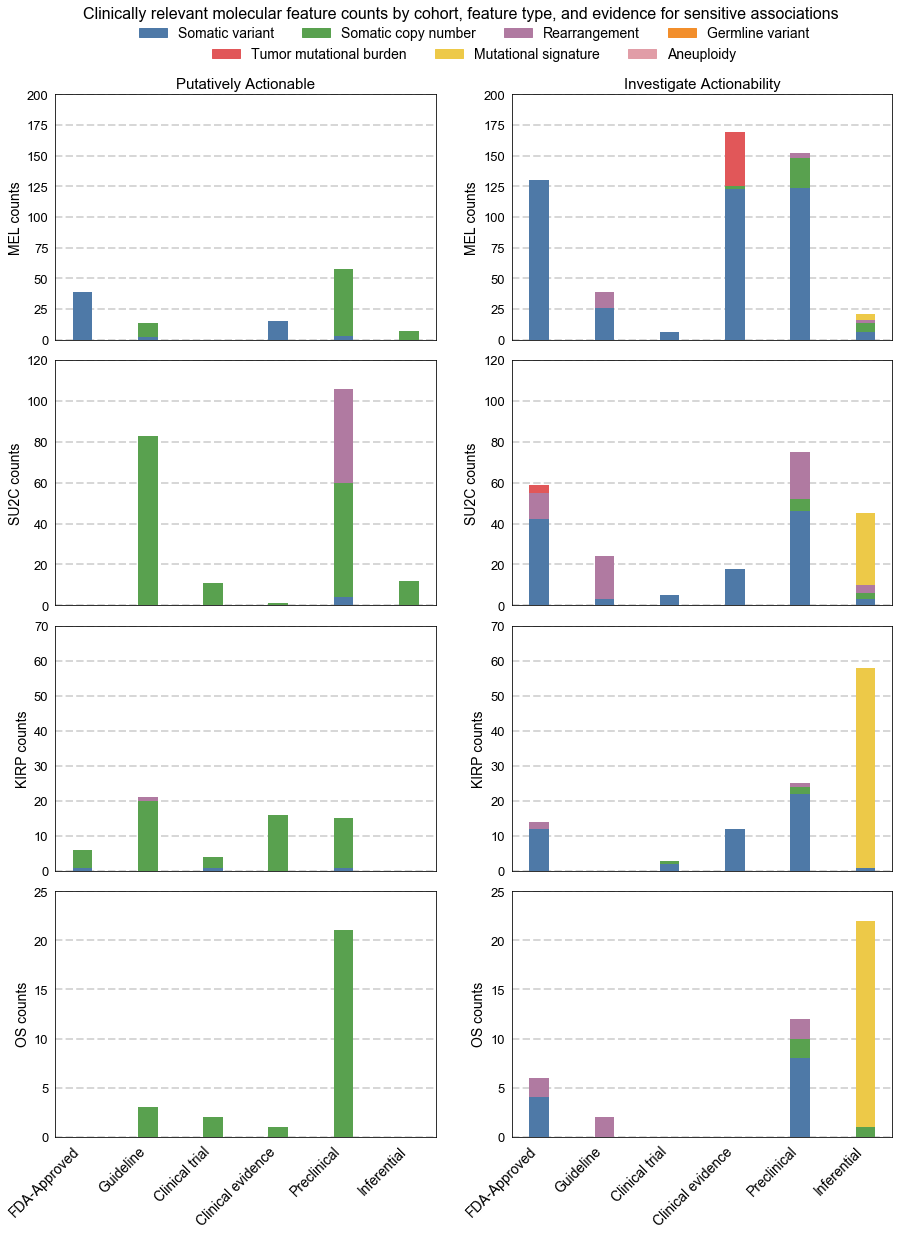

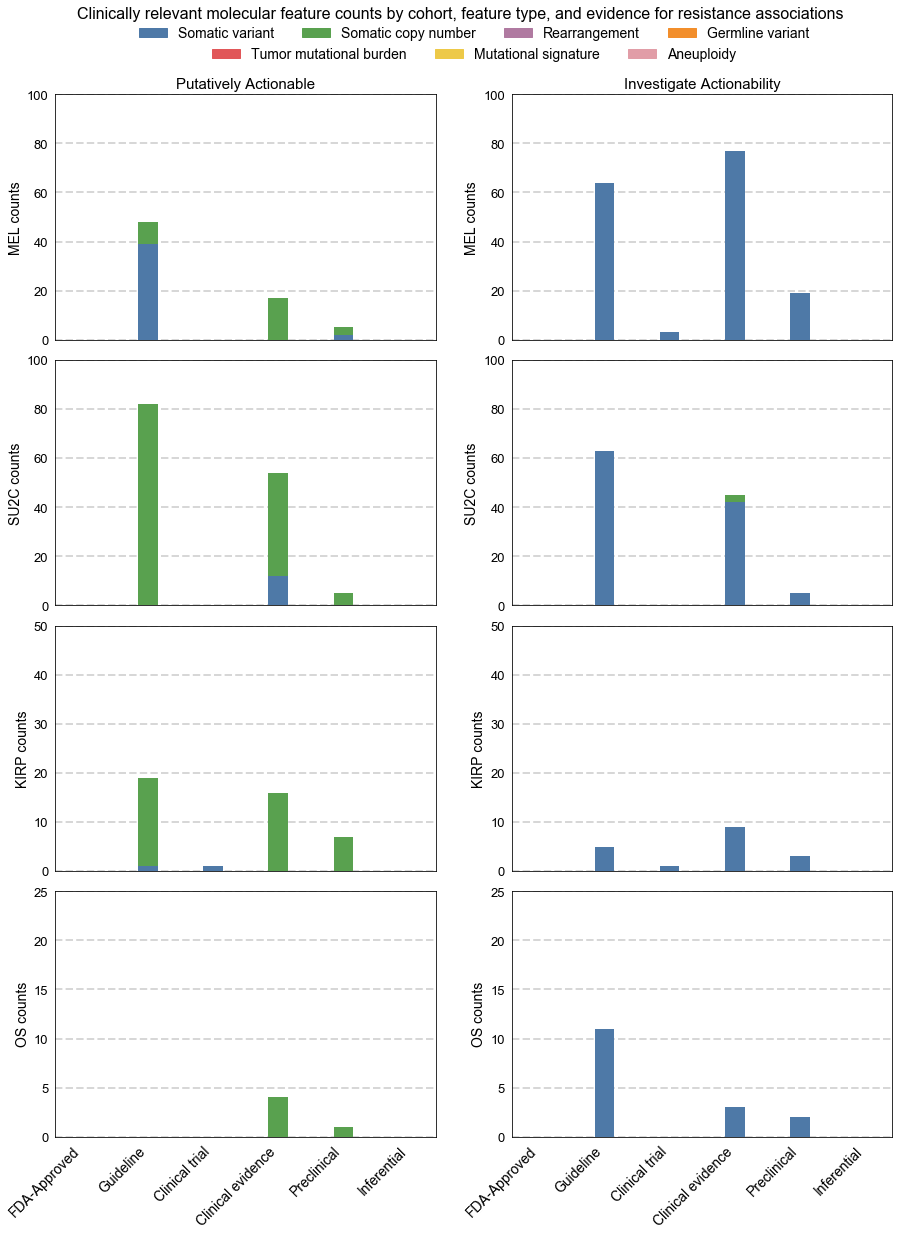

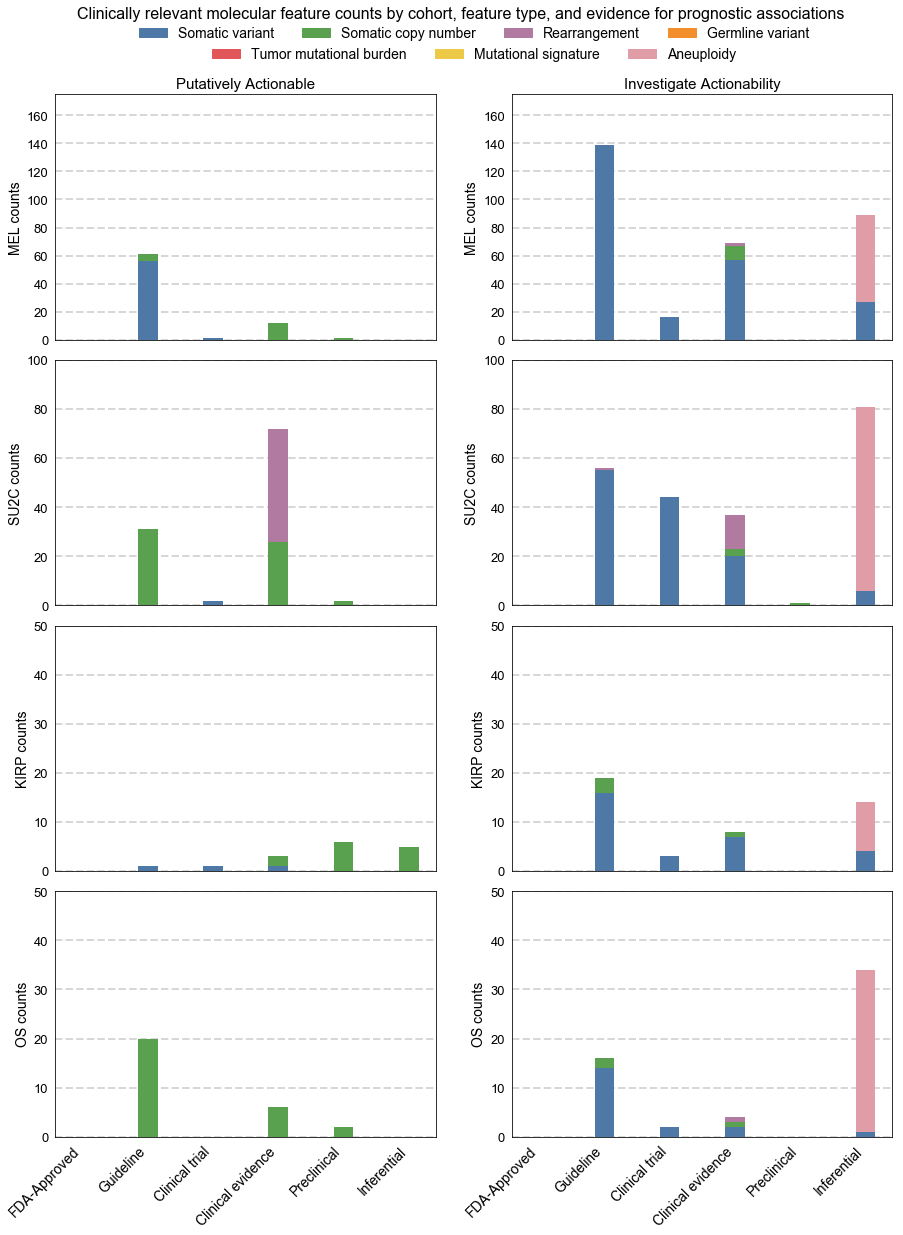

In [22]:
dataframe = pd.read_csv('retrospective.counts-by-category.txt', sep='\t')

feature_types = {
    'Somatic variant': tableau10['blue'],
    'Somatic copy number': tableau10['green'],
    'Rearrangement': tableau10['purple'],
    'Germline variant': tableau10['orange'],
    'Tumor mutational burden': tableau10['red'],
    'Mutational signature': tableau10['yellow'],
    'Aneuploidy': tableau10['pink']
}

x_pos = {
    'FDA-Approved': 1.0,
    'Guideline': 2.0,
    'Clinical trial': 3.0,
    'Clinical evidence': 4.0,
    'Preclinical': 5.0,
    'Inferential': 6.0
}

bottoms_zero = {
    'FDA-Approved': 0,
    'Guideline': 0,
    'Clinical trial': 0,
    'Clinical evidence': 0,
    'Preclinical': 0,
    'Inferential': 0
}

ymax = {
    'MEL': {'sensitive': 200, 'resistance': 100, 'prognostic': 175},
    'SU2C': {'sensitive': 120, 'resistance': 100, 'prognostic': 100},
    'KIRP': {'sensitive': 70, 'resistance': 50, 'prognostic': 50},
    'OS': {'sensitive': 25, 'resistance': 25, 'prognostic': 50}
}

ctype = 'sensitive'

def plot_gridspec(gs_row, gs_column, df, cohort, actionability, ctype, bottoms, title='', ymax=0):
    ax = plt.subplot(gs[gs_row, gs_column])
    ax.set_axisbelow(True)
    plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=2)
    
    tmp = df.loc[(df['cohort'].eq(cohort) & df['bin'].eq(actionability) & df['assertion'].eq(ctype)), :]
    
    for ftype, color in feature_types.items():
        iteration = 0
        for etype, bottom in bottoms.items():
            value = tmp.loc[tmp['feature_type'].eq(ftype) & tmp['evidence'].eq(etype), 'event counts'].tolist()[0]
            if iteration == 0:
                plt.bar(x_pos[etype], value, width, color=color, align='center', bottom=bottom, label=ftype)
            else:
                plt.bar(x_pos[etype], value, width, color=color, align='center', bottom=bottom)
            bottoms[etype] = bottom + value
            iteration += 1
    if title != '':
        plt.title(title, fontsize=15)
        
    if ymax != 0:
        plt.ylim([0, ymax])
    
    plt.ylabel(f'{cohort} counts', fontsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)
    
    if gs_row == 4:
        ax.set_xticklabels([''] + list(x_pos.keys()), fontsize = 14, rotation=45, ha='right')
    else:
        ax.set_xticklabels([])
        
    plt.tick_params(axis = 'both', which = 'both', bottom=False, left=False)

for ctype, filename in [('sensitive', 'supplementary-figure-16'),
                        ('resistance', 'supplementary-figure-17'), 
                        ('prognostic', 'supplementary-figure-18')]:
    fig = plt.figure(figsize=(15, 20))
    gs = gridspec.GridSpec(5, 2, width_ratios = [1, 1], height_ratios = [0.1, 1, 1, 1, 1], hspace=0.1)

    title = f'Clinically relevant molecular feature counts by cohort, feature type, and evidence for {ctype} associations'
    plt.suptitle(title, y=0.91, fontsize = 16)

    ax_legend = plt.subplot(gs[0, :])
    patches = [mpatches.Patch(color=color, label=label) for label, color in feature_types.items()]
    l1 = plt.legend(patches[:4], list(feature_types.keys())[:4], loc='lower center', frameon=False, fontsize=14, ncol=4)
    plt.gca().add_artist(l1)
    l2 = plt.legend(patches[4:], list(feature_types.keys())[4:], loc='upper center', frameon=False, fontsize=14, ncol=3)
    l2.remove()
    l1._legend_box._children.append(l2._legend_handle_box)
    l1._legend_box.stale = True

    remove_spines(ax_legend)
    remove_ticks()

    for row, cohort in [(1, 'MEL'), (2, 'SU2C'), (3, 'KIRP'), (4, 'OS')]:
        for column, actionability in [(0, 'Putatively Actionable'), (1, 'Investigate Actionability')]:
            subtitle = actionability if row == 1 else ''
            plot_gridspec(row, column, dataframe, cohort, actionability, ctype, bottoms_zero.copy(), title=subtitle, ymax=ymax[cohort][ctype])
    
    folder = f'../../figures/{filename}'
    !mkdir -p $folder
    for suffix in ['svg', 'png', 'pdf']:
        outname = f'{folder}/{filename}.{suffix}'
        plt.savefig(outname, format=suffix, bbox_inches='tight')
        
    (dataframe
     .loc[dataframe['assertion'].eq(ctype), :]
     .to_excel(f'{folder}/{filename}.xlsx', index=False)
    )

    plt.show()

## Circle plots

In [23]:
size_mel = 110
size_su2c = 150
size_kirp = 100
size_os = 59

df = pd.read_csv('retrospective.actionability.txt', sep='\t')
df.head()

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
0,KIRP-2K-A9WE,ASXL1.Amplification,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,ASXL1 Amp
1,KIRP-2K-A9WE,AURKA.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,Preclinical,NaN,Somatic copy number,AURKA Amp
2,KIRP-2K-A9WE,COSMIC Signature 12,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Mutational signature,COSMIC Signature 12
3,KIRP-2K-A9WE,COSMIC Signature 4,Investigate Actionability,NaN,1,KIRP,Inferential,NaN,NaN,NaN,Mutational signature,COSMIC Signature 4
4,KIRP-2K-A9WE,TPX2.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,NaN,Preclinical,NaN,Somatic copy number,TPX2 Amp


In [24]:
idx_ftype = df['feature_type'].isin(['Somatic variant', 'Somatic copy number'])
idx_almanac = df['almanac_bin'].isin(['Putatively Actionable', 'Investigate Actionability'])
idx_phial = df['phial_bin'].isin(['Putatively Actionable', 'Investigate Actionability'])

In [25]:
df['cohort'].value_counts()

MEL     1831
SU2C    1322
KIRP     532
OS       344
Name: cohort, dtype: int64

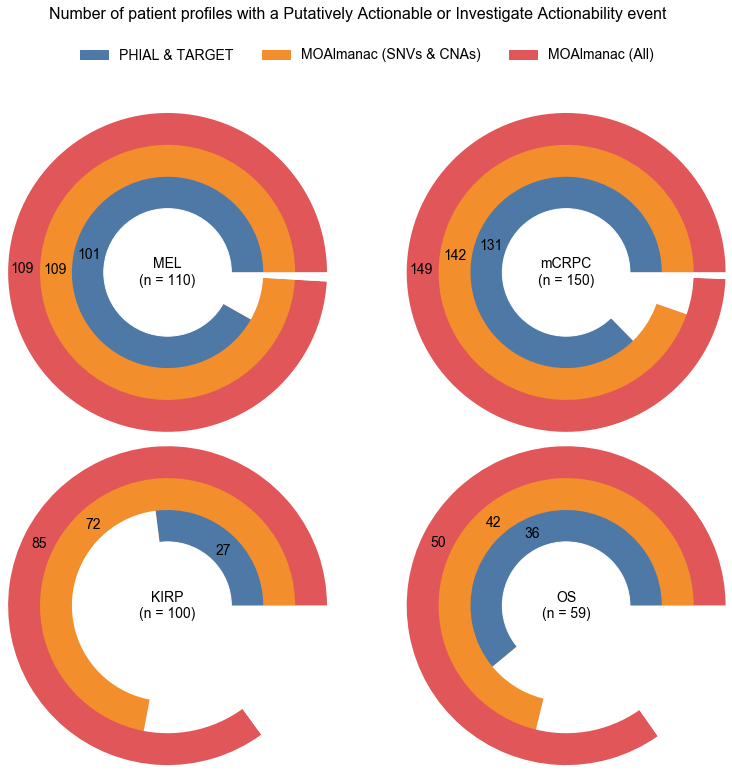

In [26]:
def create_circle_plot(gs_row, gs_column, n_total, n_group1, n_group2, n_group3, label,
                      group1_pos=0.76, group2_pos=0.81, group3_pos=0.85):
    ax = plt.subplot(gs[gs_row, gs_column])
    group_1 = [n_group1, n_total - n_group1]
    group_2 = [n_group2, n_total - n_group2]
    group_3 = [n_group3, n_total - n_group3]
    plt.pie(group_3, radius=2.5, 
            colors=[tableau10['red'], 'white'], labels=[f'{n_group3}', ''], 
            labeldistance=group3_pos, textprops={'fontsize': 14})
    plt.pie(group_2, radius=2.0, 
            colors=[tableau10['orange'], 'white'], labels=[f'{n_group2}', ''], 
            labeldistance=group2_pos, textprops={'fontsize': 14})
    plt.pie(group_1, radius=1.5, 
            colors=[tableau10['blue'], 'white'], labels=[f'{n_group1}', ''], 
            labeldistance=group1_pos, textprops={'fontsize': 14})
    
    center_label = f'{label}\n(n = {n_total})'
    center_circle = plt.Circle( (0,0), 1, color='white')
    p = plt.gcf()
    p.gca().add_artist(center_circle)
    
    label = ax.annotate(center_label, xy=(0, 0), fontsize=14, ha='center', va='center')
    
    return p

def get_patient_counts(dataframe, idx):
    return dataframe[idx]['patient_id'].drop_duplicates().shape[0]

fig = plt.figure(figsize=(10, 13.33))
title = f'Number of patient profiles with a Putatively Actionable or Investigate Actionability event'
plt.suptitle(title, y=0.9, fontsize = 16)

gs = gridspec.GridSpec(3, 2, width_ratios = [1, 1], height_ratios = [0.2, 1, 1], wspace = 1.5)

labels = {
    'PHIAL & TARGET': tableau10['blue'],
    'MOAlmanac (SNVs & CNAs)': tableau10['orange'],
    'MOAlmanac (All)': tableau10['red']
}

ax_legend = plt.subplot(gs[0, :])
patches = [mpatches.Patch(color=color, label=label) for label, color in labels.items()]
legend = plt.legend(patches, list(labels.keys()), loc='center', frameon=False, fontsize=14, ncol=3)

remove_spines(ax_legend)
remove_ticks()

p_m = create_circle_plot(1, 0, 110, 
                         get_patient_counts(df, (idx_phial & df['cohort'].eq('MEL'))), 
                         get_patient_counts(df, (idx_almanac & idx_ftype & df['cohort'].eq('MEL'))),
                         get_patient_counts(df, (idx_almanac & df['cohort'].eq('MEL'))),
                         'MEL',
                         group1_pos=0.72, group2_pos=0.79, group3_pos=0.84)
p_p = create_circle_plot(1, 1, 150, 
                         get_patient_counts(df, (idx_phial & df['cohort'].eq('SU2C'))), 
                         get_patient_counts(df, (idx_almanac & idx_ftype & df['cohort'].eq('SU2C'))),
                         get_patient_counts(df, (idx_almanac & df['cohort'].eq('SU2C'))),
                         'mCRPC',
                         group1_pos=0.72, group2_pos=0.79, group3_pos=0.84)
p_k = create_circle_plot(2, 0, 100, 
                         get_patient_counts(df, (idx_phial & df['cohort'].eq('KIRP'))), 
                         get_patient_counts(df, (idx_almanac & idx_ftype & df['cohort'].eq('KIRP'))),
                         get_patient_counts(df, (idx_almanac & df['cohort'].eq('KIRP'))),
                         'KIRP',
                         group1_pos=0.76, group2_pos=0.82)
p_O = create_circle_plot(2, 1, 59, 
                         get_patient_counts(df, (idx_phial & df['cohort'].eq('OS'))), 
                         get_patient_counts(df, (idx_almanac & idx_ftype & df['cohort'].eq('OS'))),
                         get_patient_counts(df, (idx_almanac & df['cohort'].eq('OS'))),
                         'OS',
                         group1_pos=0.80, group2_pos=0.82)

filename = 'supplementary-figure-5'
folder = f'../../figures/supplementary-figure-05'
!mkdir -p $folder
for suffix in ['svg', 'png', 'pdf']:
    outname = f'{folder}/{filename}.{suffix}'
    plt.savefig(outname, format=suffix)

plt.show()

In [27]:
data = []
for cohort, n in [('MEL', 110), ('SU2C', 150), ('KIRP', 100), ('OS', 59)]:
    cohort_data = {
        'cohort': 'mCRPC' if cohort == 'SU2C' else cohort,
        'PHIAL & TARGET': get_patient_counts(df, (idx_phial & df['cohort'].eq(cohort))),
        'MOAlmanac (SNVs & CNAs)': get_patient_counts(df, (idx_almanac & idx_ftype & df['cohort'].eq(cohort))),
        'MOAlmanac (All)': get_patient_counts(df, (idx_almanac & df['cohort'].eq(cohort))),
        'total': n
    }
    data.append(cohort_data)
    
sf5 = pd.DataFrame.from_records(data)
sf5.to_excel(f'{folder}/{filename}.xlsx', index=False)